In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")
%matplotlib inline
import seaborn as sns
from PIL import Image
from PIL import ImageOps
import numpy as np
sns.set(font="Droid Sans",font_scale = 2)
sns.set_style("white")
sns.set_color_codes("dark")
import pickle as pkl
from tensorflow.examples.tutorials.mnist import input_data
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.applications.vgg16 import VGG16
plt.rcParams['figure.figsize'] = 10, 8

/Users/adamhuang/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/adamhuang/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/adamhuang/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/adamhuang/anaconda3/lib/python3.6/site-packages/tensorflow/pyth

In [2]:
mnistm = pkl.load(open("mnistm_data.pkl", 'rb'))
shape_train = mnistm['train'].shape
shape_test = mnistm['test'].shape
mnistm_train = mnistm['train']
mnistm_test = mnistm['test']

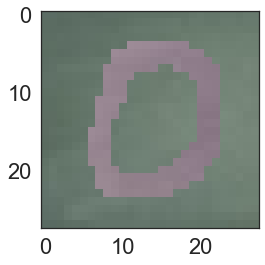

In [3]:
plt.rcParams['figure.figsize'] = 6, 4
plt.imshow(mnistm_test[10], cmap = "gray")

In [4]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
mnist_train = (mnist.train.images > 0).reshape(55000, 28, 28, 1).astype(np.uint8) * 255
mnist_train = np.concatenate([mnist_train, mnist_train, mnist_train], 3)
mnist_test = (mnist.test.images > 0).reshape(10000, 28, 28, 1).astype(np.uint8) * 255
mnist_test = np.concatenate([mnist_test, mnist_test, mnist_test], 3)
mnist_train_labels = mnist.train.labels
mnist_test_labels = mnist.test.labels

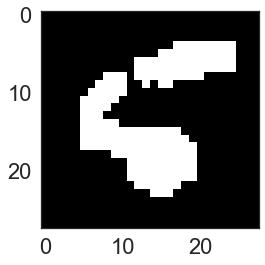

In [6]:
plt.imshow(mnist_test[8], cmap = "gray")
plt.rcParams['figure.figsize'] = 10, 8

## Train on MNIST-M

In [ ]:
model_m = Sequential()
model_m.add(Conv2D(32, (5, 5), input_shape=(28, 28, 3), activation='relu',data_format="channels_last"))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Conv2D(15, (3, 3), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Flatten())
model_m.add(Dense(128, activation='relu'))
model_m.add(Dense(50, activation='relu'))
model_m.add(Dense(10, activation='softmax'))
model_m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_m.summary()

In [ ]:
model_m.fit(x=mnistm_train, y=mnist_train_labels, batch_size=1024, epochs=20, validation_split=0.15,
                    verbose=1)

In [16]:
model_m.evaluate(mnistm_test, mnist_test_labels)

10000/10000 [==============================] - 2s 245us/step


[0.23262736336290837, 0.929]

In [17]:
model_m.evaluate(mnist_test, mnist_test_labels)

10000/10000 [==============================] - 2s 227us/step


[0.1232639085067669, 0.9632]

In [18]:
fe1_m = Model(inputs = model_m.inputs, outputs = model_m.layers[0].output)
fe1_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [64]:
fe1_m_pred = fe1_m.predict(mnist_test)
fe1_m_pred_m = fe1_m.predict(mnist_test)

In [65]:
fe1_m_pred_m.shape

(10000, 24, 24, 32)

In [66]:
activations_m = []
activations = []
for i in range(fe1_m_pred_m.shape[3]):
    activations.append(np.mean(fe1_m_pred[:,:,:,i]))
    activations_m.append(np.mean(fe1_m_pred_m[0,:,:,i]))

In [72]:
activations_m  = np.array(activations_m)
activations = np.array(activations)

In [73]:
kernel_index = np.arange(1,33,1)

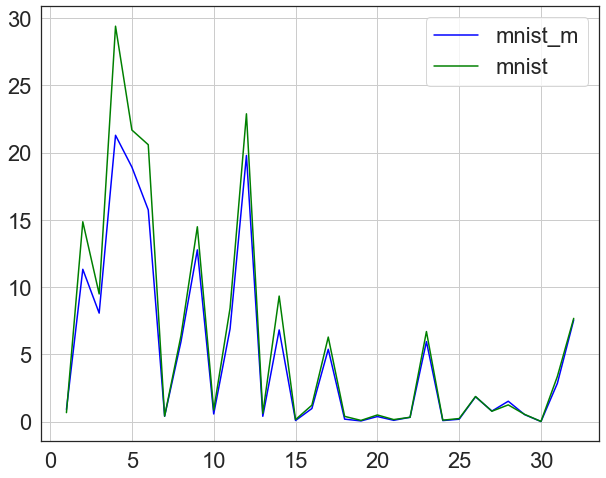

In [74]:
plt.plot(kernel_index, activations_m, label = "mnist_m", color = "blue")
plt.plot(kernel_index, activations, label = "mnist", color = "green")
plt.grid()
plt.legend()
plt.show()

In [40]:
fe2_m = Model(inputs = model_m.inputs, outputs = model_m.layers[2].output)
fe2_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4335      
Total params: 6,767
Trainable params: 6,767
Non-trainable params: 0
_________________________________________________________________


In [75]:
fe2_m_pred = fe2_m.predict(mnist_test)
fe2_m_pred_m = fe2_m.predict(mnistm_test)

In [76]:
activations_m_2 = []
activations_2 = []
for i in range(fe2_m_pred_m.shape[3]):
    activations_2.append(np.mean(fe2_m_pred[:,:,:,i]))
    activations_m_2.append(np.mean(fe2_m_pred_m[:,:,:,i]))

In [77]:
kernel_index = np.arange(1,16,1)

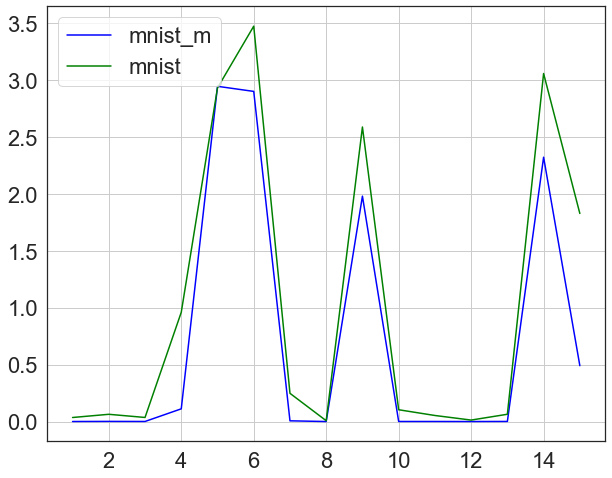

In [78]:
plt.plot(kernel_index, activations_m_2, label = "mnist_m", color = "blue")
plt.plot(kernel_index, activations_2, label = "mnist", color = "green")
plt.grid()
plt.legend()
plt.show()

## Train on MNIST

In [46]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 3), activation='relu',data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4335      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               48128     
__________

In [47]:
model.fit(x=mnist_train, y=mnist_train_labels, batch_size=1024, epochs=10, validation_split=0.15,
                    verbose=1)

Train on 46750 samples, validate on 8250 samples
Epoch 1/10
46750/46750 [==============================] - 31s 665us/step - loss: 4.8220 - acc: 0.5515 - val_loss: 0.5283 - val_acc: 0.8490
Epoch 2/10
46750/46750 [==============================] - 30s 637us/step - loss: 0.5752 - acc: 0.8417 - val_loss: 0.2744 - val_acc: 0.9211
Epoch 3/10
46750/46750 [==============================] - 31s 655us/step - loss: 0.3571 - acc: 0.8968 - val_loss: 0.1949 - val_acc: 0.9429
Epoch 4/10
46750/46750 [==============================] - 39s 827us/step - loss: 0.2737 - acc: 0.9201 - val_loss: 0.1671 - val_acc: 0.9538
Epoch 5/10
46750/46750 [==============================] - 37s 796us/step - loss: 0.2297 - acc: 0.9313 - val_loss: 0.1418 - val_acc: 0.9601
Epoch 6/10
46750/46750 [==============================] - 37s 792us/step - loss: 0.1882 - acc: 0.9433 - val_loss: 0.1247 - val_acc: 0.9651
Epoch 7/10
46750/46750 [==============================] - 38s 811us/step - loss: 0.1686 - acc: 0.9476 - val_loss: 0.1

In [48]:
model.evaluate(mnist_test,mnist_test_labels)

10000/10000 [==============================] - 3s 269us/step


[0.08519721372323111, 0.9746]

In [49]:
model.evaluate(mnistm_test,mnist_test_labels)

10000/10000 [==============================] - 2s 238us/step


[1.8867907148361207, 0.3958]

In [50]:
fe1 = Model(inputs = model.inputs, outputs = model.layers[0].output)
fe1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3_input (InputLayer)  (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [79]:
fe1_pred = fe1.predict(mnist_test)
fe1_pred_m = fe1.predict(mnistm_test)

In [84]:
activations_m_1 = []
activations_1 = []
for i in range(fe1_pred.shape[3]):
    activations_1.append(np.mean(fe1_pred[:,:,:,i]))
    activations_m_1.append(np.mean(fe1_pred_m[:,:,:,i]))

In [85]:
activations_m_1  = np.array(activations_m_1)
activations_1 = np.array(activations_1)

In [86]:
kernel_index = np.arange(1,33,1)

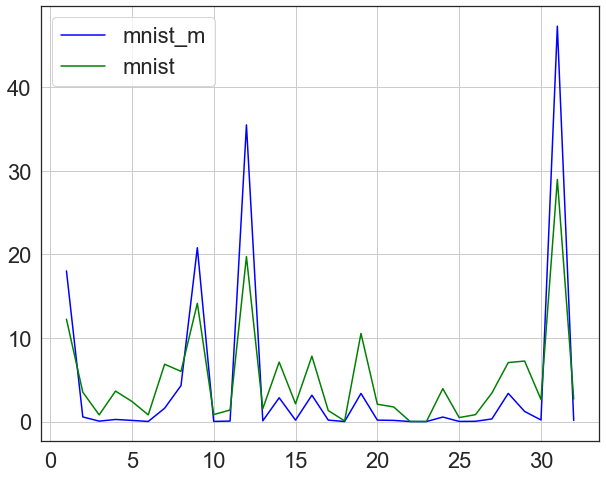

In [87]:
plt.plot(kernel_index, activations_m_1, label = "mnist_m", color = "blue")
plt.plot(kernel_index, activations_1, label = "mnist", color = "green")
plt.grid()
plt.legend()
plt.show()

In [58]:
fe2 = Model(inputs = model.inputs, outputs = model.layers[2].output)
fe2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3_input (InputLayer)  (None, 28, 28, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4335      
Total params: 6,767
Trainable params: 6,767
Non-trainable params: 0
_________________________________________________________________


In [91]:
fe2_pred = fe2.predict(mnist_test)
fe2_pred_m = fe2.predict(mnistm_test)

In [95]:
activations_m_3 = []
activations_3 = []
for i in range(fe2_pred_m.shape[3]):
    activations_3.append(np.mean(fe2_pred[:,:,:,i]))
    activations_m_3.append(np.mean(fe2_pred_m[:,:,:,i]))

In [96]:
kernel_index = np.arange(1,16,1)

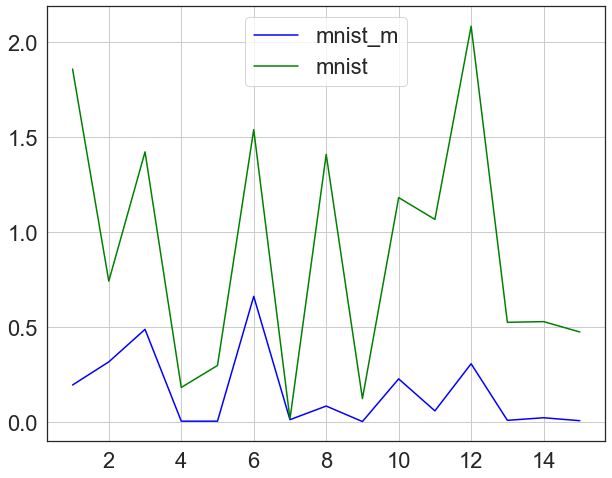

In [97]:
plt.plot(kernel_index, activations_m_3, label = "mnist_m", color = "blue")
plt.plot(kernel_index, activations_3, label = "mnist", color = "green")
plt.grid()
plt.legend()
plt.show()

## Train with VGG16 

In [7]:
import cv2
plt.rcParams['figure.figsize'] = 6, 4

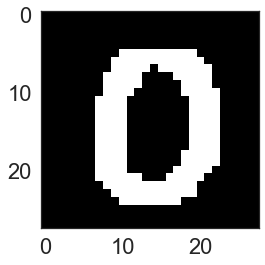

In [8]:
img = mnist_train[10]
plt.imshow(img)

In [9]:
res = cv2.resize(img, dsize=(56, 56))

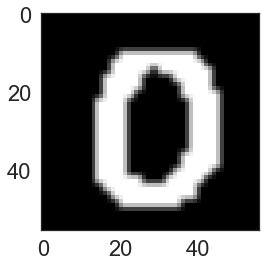

In [10]:
plt.imshow(res)

In [11]:
vgg_16_mnist_train = []
for img in mnist_train:
    vgg_16_mnist_train.append(cv2.resize(img,dsize=(56,56)))

In [12]:
vgg_16_mnist_train = np.array(vgg_16_mnist_train)
vgg_16_mnist_train.shape

(55000, 56, 56, 3)

In [22]:
vgg_16_mnist_test = []
for img in mnist_test:
    vgg_16_mnist_test.append(cv2.resize(img,dsize=(56,56)))
vgg_16_mnist_test = np.array(vgg_16_mnist_test)

In [30]:
vgg_16_mnistm_train = []
for img in mnistm_train:
    vgg_16_mnistm_train.append(cv2.resize(img,dsize=(56,56)))
vgg_16_mnistm_train = np.array(vgg_16_mnistm_train)
vgg_16_mnistm_train.shape

(55000, 56, 56, 3)

In [31]:
vgg_16_mnistm_test = []
for img in mnistm_test:
    vgg_16_mnistm_test.append(cv2.resize(img,dsize=(56,56)))
vgg_16_mnistm_test = np.array(vgg_16_mnistm_test)

In [16]:
vgg_16_subset, vgg_16_test, vgg_train_labels, vgg_test_labels = train_test_split(vgg_16_mnist_train, mnist_train_labels, test_size=0.95, random_state=42)

In [17]:
model_vgg = Sequential()
layer = VGG16(include_top=False, weights='imagenet', input_shape=(56, 56, 3))
layer.trainable=False
model_vgg.add(layer)
model_vgg.add(Dropout(0.2))
model_vgg.add(Flatten())
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dense(50, activation='relu'))
model_vgg.add(Dense(10, activation='softmax'))
model_vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 14,787,312
Trainable params: 72,624
Non-trainable params: 14,714,688
___________________________________________________________

In [56]:
history = model_vgg.fit(x=vgg_16_subset, y=vgg_train_labels, batch_size=1, epochs=50, validation_split=0.15,
                    verbose=1)

Train on 2337 samples, validate on 413 samples
Epoch 1/50
2337/2337 [==============================] - 109s 47ms/step - loss: 0.4841 - acc: 0.8451 - val_loss: 0.5432 - val_acc: 0.8523
Epoch 2/50
2337/2337 [==============================] - 108s 46ms/step - loss: 0.5006 - acc: 0.8511 - val_loss: 0.6105 - val_acc: 0.8450
Epoch 3/50
2337/2337 [==============================] - 102s 44ms/step - loss: 0.4803 - acc: 0.8481 - val_loss: 0.7626 - val_acc: 0.8111
Epoch 4/50
2337/2337 [==============================] - 101s 43ms/step - loss: 0.4962 - acc: 0.8502 - val_loss: 0.5855 - val_acc: 0.8450
Epoch 5/50
2337/2337 [==============================] - 101s 43ms/step - loss: 0.4630 - acc: 0.8562 - val_loss: 0.7212 - val_acc: 0.8281
Epoch 6/50
2337/2337 [==============================] - 104s 44ms/step - loss: 0.4221 - acc: 0.8635 - val_loss: 0.5764 - val_acc: 0.8620
Epoch 7/50
2337/2337 [==============================] - 103s 44ms/step - loss: 0.4821 - acc: 0.8571 - val_loss: 0.6952 - val_acc: 0

In [57]:
model_vgg.evaluate(vgg_16_mnistm_test,mnist_test_labels)

10000/10000 [==============================] - 293s 29ms/step


[10.561801641845703, 0.2979]

In [58]:
model_vgg.evaluate(vgg_16_mnist_test,mnist_test_labels)

10000/10000 [==============================] - 288s 29ms/step


[0.8525312386989593, 0.8313]

In [41]:
vgg_layers = model_vgg.layers[0]

In [43]:
vgg_layers.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 56, 56, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 28, 28, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 28, 28, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 28, 28, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 14, 14, 128)       0         
__________

In [47]:
fe1_vgg = Model(inputs = vgg_layers.inputs, outputs = vgg_layers.layers[1].output)
fe1_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 56, 56, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [48]:
fe2_vgg = Model(inputs = vgg_layers.inputs, outputs = vgg_layers.layers[2].output)
fe2_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 56, 56, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [53]:
fe3_vgg = Model(inputs = vgg_layers.inputs, outputs = vgg_layers.layers[15].output)
fe3_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 56, 56, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 28, 28, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 28, 28, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 28, 28, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 14, 14, 128)       0         
__________

In [54]:
fe4_vgg = Model(inputs = vgg_layers.inputs, outputs = vgg_layers.layers[16].output)
fe4_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 56, 56, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 28, 28, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 28, 28, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 28, 28, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 14, 14, 128)       0         
__________

In [55]:
fe5_vgg = Model(inputs = vgg_layers.inputs, outputs = vgg_layers.layers[17].output)
fe5_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 56, 56, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 56, 56, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 56, 56, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 28, 28, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 28, 28, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 28, 28, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 14, 14, 128)       0         
__________